 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:40px;text-align:center;
              color:white;">
            House Price
        </p>
    </div>
    </p>
</div>

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008b;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;
              color:white;">
           Regresyon Nedir?
            
📈Regresyon değişkenler arasındaki ilişkileri ortaya koyan ve buna göre tahminler üretilmesini sağlayan istatistiksel bir ölçümdür.
Regresyon problemleri genellikle sürekli ve sınırsız bağımlı değişkene sahiptir. Problemlerin girdileri; cinsiyet, milliyet, marka vb. sürekli, ayrık hatta kategorik veriler olabilir.
            
Regresyona Ne Zaman İhtiyacımız Var?
            
📈Bazı olayların diğerini etkileyip etkilemediğini, nasıl etkilediğini  veya birkaç değişkenin arasında nasıl bir ilişki olduğunu cevaplamak için regresyona ihtiyaç duyarız. Örneğin, deneyim veya cinsiyetin maaşları etkileyip etkilemediğini ve ne ölçüde etkilediğini belirlemek için regresyonu kullanabiliriz.
        </p>
    </div>
    </p>
</div>


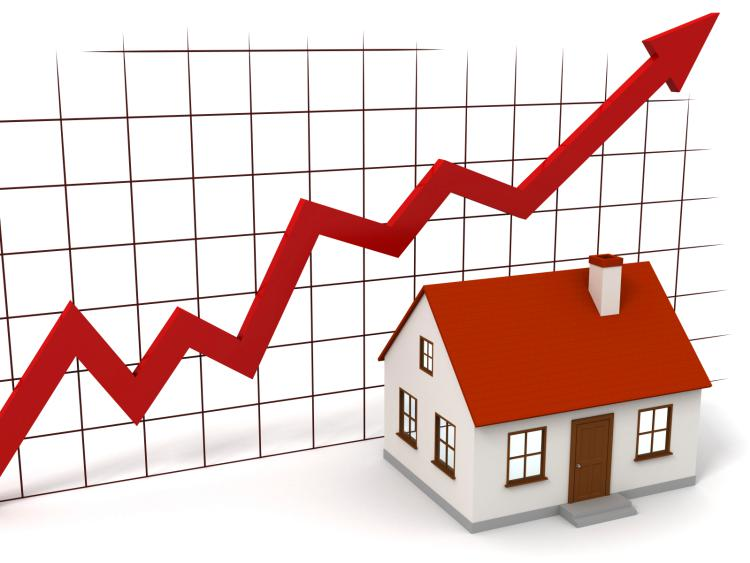

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:white;">
           🏡 Introduction 🏡
        </p>
    </div>
    </p>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
data=pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.shape

(21613, 21)

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Verimiz içinde 5 tane float64, 15 tane int64 ve 1 object türünde olmak üzere 21 özellik barındırıyor. Ayrıca bu verilerin hiçbirinde eksik bir veri yok. Biraz özelliklerimizi tanıyalım:
* 
* id: evin kimlik verisi
* date: evin satıldığı gün
* bedrooms: yatak odası sayısı
* bathrooms: banyo sayısı
* sqft_living: evin alanı(foot ölçüsüyle)
* sqft_lot: evin arsasının alanı(foot ölçüsüyle)
* floors: evin kat sayısı
* waterfront: ev deniz kıyısında mı?
* view: evin cephe sayısı
* condition: evin durumu (1'den 5'e kadar puanlanmış)
* grade: Seattle derecelendirme sistemine dayanan konut birimine verilen genel not (1'den 5'e kadar puanlanmış)
* sqft_above: evin bodrum dışındaki odaların alanı(foot ölçüsüyle)
* sqft_basement: bodrumun alanı(foot ölçüsüyle)
* yr_built: evin yapılış yılı
* yr_renovated: evin yenilendiği yıl
* zipcode: posta kodu
* lat: enlem koordinatı
* long: boylam koordinatı
* sqft_living15: 2015 yılında yenilenen evlerde alan değişikliği
* sqft_lot15: 2015 yılında yenilenen evlerde arsa değişikliği

In [7]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:white;">
           Checking Null Values 🚫
        </p>
    </div>
    </p>
</div>

In [8]:
print(pd.isnull(data).sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:white;">
           🔍 Data Exploration 🔍
        </p>
    </div>
    </p>
</div>

In [9]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


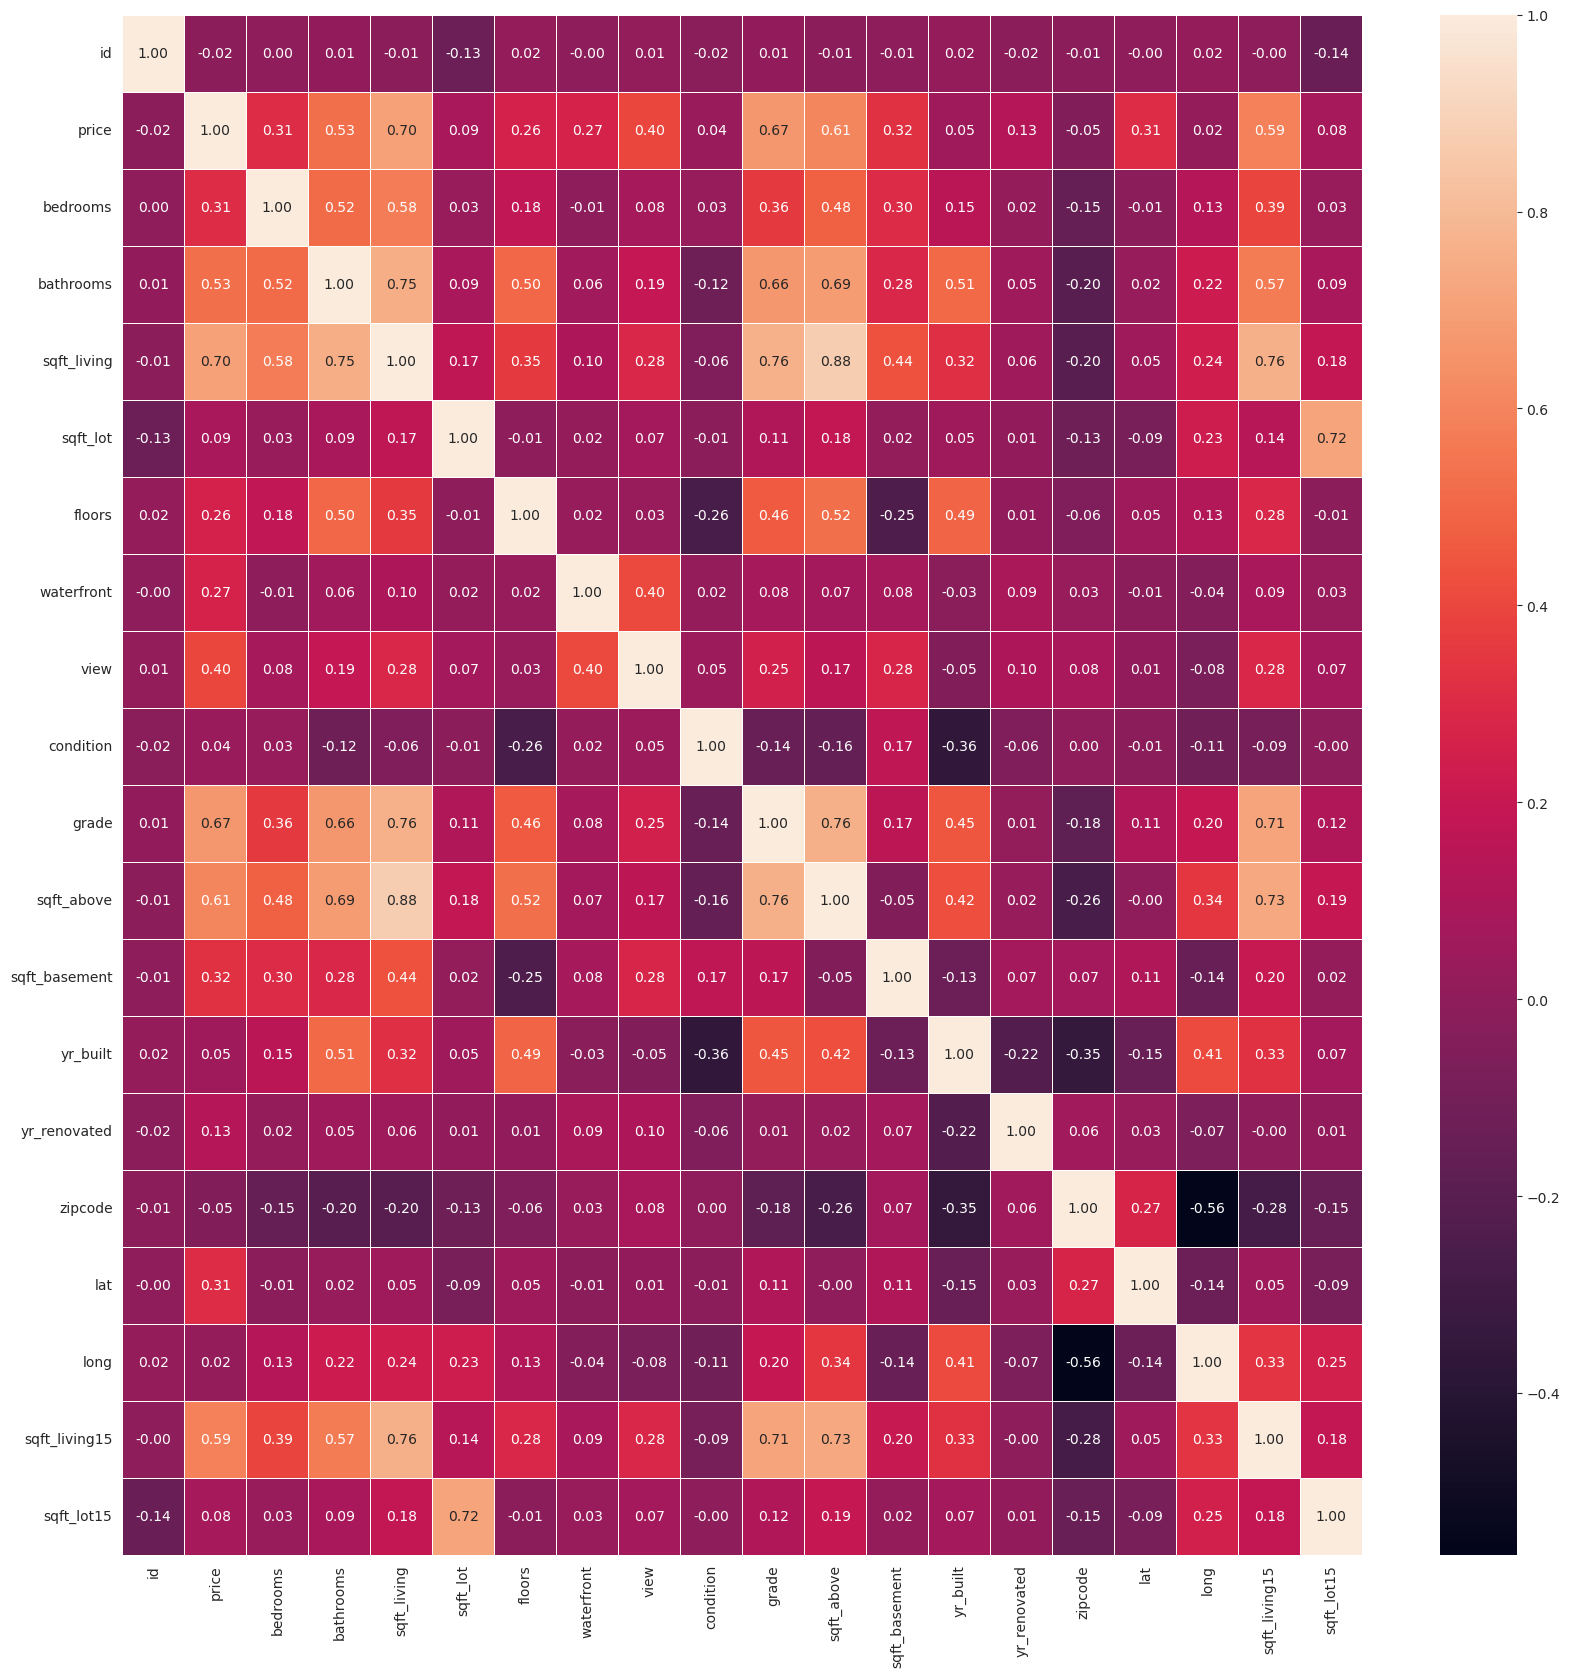

In [10]:
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

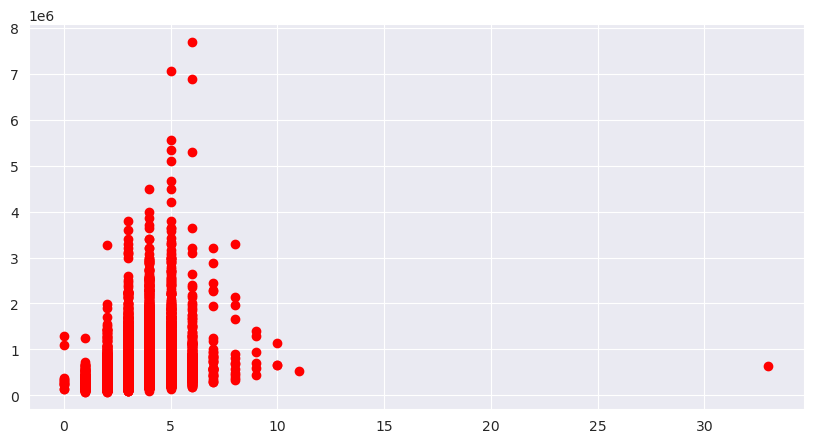

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(x=data.bedrooms,y=data.price,color="red")
plt.show()

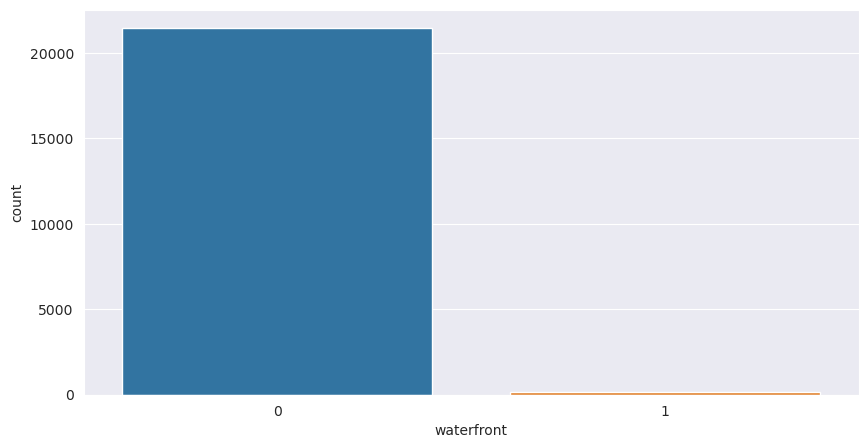

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="waterfront")
plt.show()

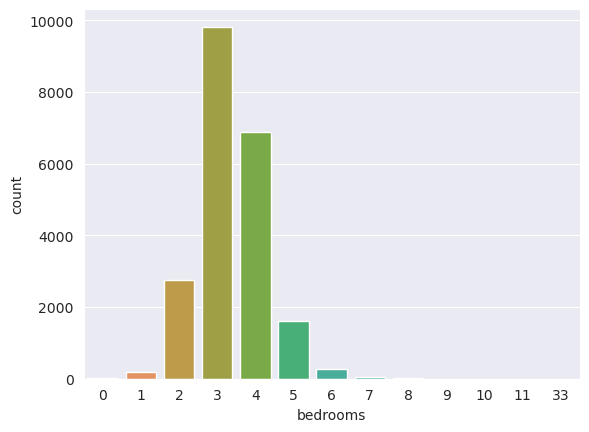

In [14]:
sns.countplot(data=data, x="bedrooms")
plt.show()

In [15]:
data.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


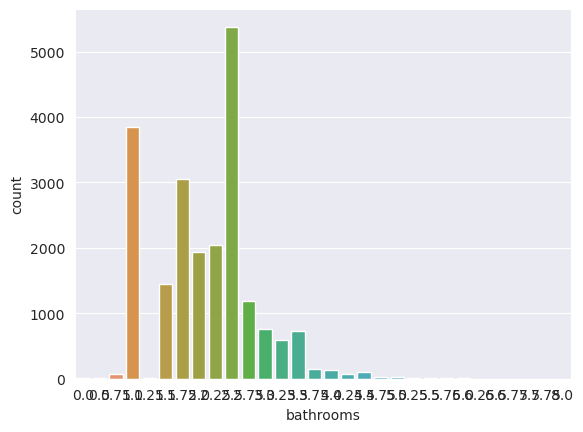

In [16]:
sns.countplot(data=data, x="bathrooms")
plt.show()

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:white;">
          💻Machine Learning Models 💻
        </p>
    </div>
    </p>
</div>

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#eee8aa">
📉 Simple Linear Regression 📉
        </p>
    </div>
    </p>
</div>

In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

B0 : [-43580.74309447]
B1 : [[280.6235679]]
R Square Values : 0.4928532179037931
****************************************************************************************************************************
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          8.920e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:44:51   Log-Likelihood:                     -2.4046e+05
No. Observations:               17290   AIC:                                  4.809e+05
Df Residuals:                   17289   BIC:                                  4.809e+05
Df Model:                           1                                                  
Co

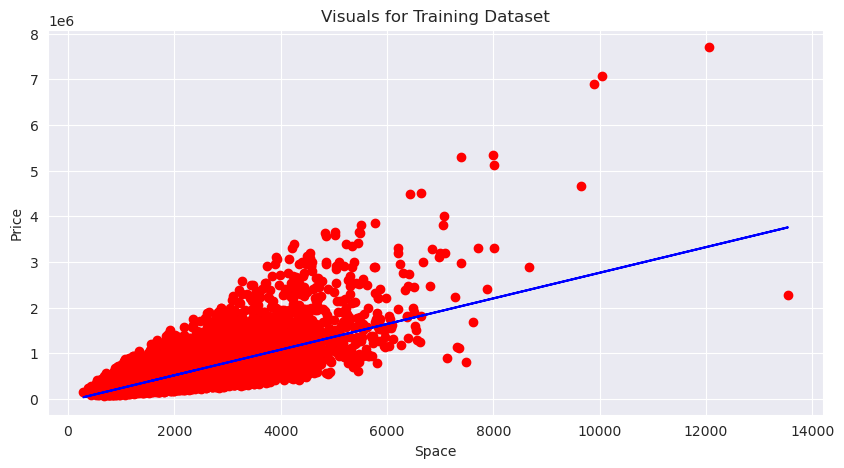

In [18]:
#Kütüphaneleri ayarlayalım

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

# bağımlı ve bağımsız değişkenleri oluşturalım.
# sqft_living -- bağımsız değişken (sqft_living: evin alanı(foot ölçüsüyle))
# price -- bağımlı değişken
x = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)


# Verileri egitim ve test icin bölelim.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

# Modeli Eğitme
# Lineer regresyon modelini inşa edelim.
linear_reg = LinearRegression()

# Model Üzerinde Tahminler Yapma
# x_trainden y_traini öğrenelim. 
linear_reg.fit(x,y)

# Test datamızla modelimize tahmin ürettirelim.
y_head = linear_reg.predict(x)

# β0 katsayısını çağırmak için =intercept,β1 katsayısını çağırmak için = coef 
# modeldeki eğim coef , modeldeki katsayı intercept
# y = β0 + β1X + ϵ
b0 = linear_reg.intercept_ 
b1 = linear_reg.coef_

print("B0 :",b0)
print("B1 :",b1)

# R-Kare (R2): Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür.
print("R Square Values :",r2_score(y,y_head))
print("****************************************************************************************************************************")

model1=sm.OLS(ytrain,xtrain)
fit1 = model1.fit()
print(fit1.summary())

print("****************************************************************************************************************************")
# Şimdi verimizi görselleştirelim.
plt.figure(figsize=(10,5))
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, linear_reg.predict(xtrain), color = 'blue') # düz çizgi
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


In [19]:
# Actual-Predict Compare
#bias_train = pd.DataFrame({'Predict': y_head, 'Actual': ytrain, 'Bias': abs(y_head - ytrain)})
#bias_train.head()

In [20]:
"""
features1 = ['bathrooms','sqft_living','grade', 'sqft_above']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_1')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)
"""

"\nfeatures1 = ['bathrooms','sqft_living','grade', 'sqft_above']\nreg= linear_model.LinearRegression()\nreg.fit(train_data[features1],train_data['price'])\npred = reg.predict(test_data[features1])\nprint('Complex Model_1')\nmean_squared_error = metrics.mean_squared_error(y_test, pred)\nprint('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))\nprint('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))\nprint('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))\nprint('Intercept: ', reg.intercept_)\nprint('Coefficient:', reg.coef_)\n"

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#eee8aa">
📉 Multiple Linear Regresyon 📉
        </p>
    </div>
    </p>
</div>


In [21]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
#Kütüphaneleri ayarlayalım
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# bağımlı ve bağımsız değişkenleri oluşturalım.
# id, zipcode(posta kodu), satılma tarihi ve konum koordinatları dışındaki tüm veriler-- bağımsız değişken 
# price -- bağımlı değişken
x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

list_score = []
list_name = [] 

# Verileri egitim ve test icin bölelim.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

# Modeli Eğitme
# Multi Lineer regresyon modelini inşa edelim.
multi_linear_reg = LinearRegression()

# Model Üzerinde Tahminler Yapma
# x_trainden y_traini öğrenelim. 
multi_linear_reg.fit(x,y)

# β0 katsayısını çağırmak için =intercept,β1 katsayısını çağırmak için = coef 
# modeldeki eğim coef , modeldeki katsayı intercept
# y = β0 + β1X + ϵ
b0 = multi_linear_reg.intercept_ 
b1 = multi_linear_reg.coef_

# Test datamızla modelimize tahmin ürettirelim.
y_head = multi_linear_reg.predict(x)


print("B0 :",b0)
print("B1 :",b1)
print("***************************************************************************************************")

#Tahmin Skoru
#R-Kare (R2): Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür.
print("R Square Values :",r2_score(y,y_head))
list_score.append(r2_score(y,y_head))
list_name.append("Multiple Linear Regresyon")
print("***************************************************************************************************")
print('Multiple Linear Regresyon Model')
from sklearn import metrics
mean_squared_error = metrics.mean_squared_error(y, y_head)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(multi_linear_reg.score(xtrain, ytrain), 3))
print('R-squared (testing) ', round(multi_linear_reg.score(xtest, ytest), 3))
print("***************************************************************************************************")
print('Intercept: ', multi_linear_reg.intercept_)
print('Coefficient:', multi_linear_reg.coef_)


B0 : [6195319.95187343]
B1 : [[-3.93066524e+04  4.57450017e+04  1.09268480e+02 -1.60061930e-03
   2.68787845e+04  5.79071616e+05  4.32353616e+04  1.95103595e+04
   1.19721824e+05  5.15164696e+01  5.77520102e+01 -3.57015920e+03
   1.01595783e+01  2.48732761e+01 -5.50504053e-01]]
***************************************************************************************************
R Square Values : 0.6537318108687113
***************************************************************************************************
Multiple Linear Regresyon Model
Mean Squared Error (MSE)  216029.37
R-squared (training)  0.655
R-squared (testing)  0.647
***************************************************************************************************
Intercept:  [6195319.95187343]
Coefficient: [[-3.93066524e+04  4.57450017e+04  1.09268480e+02 -1.60061930e-03
   2.68787845e+04  5.79071616e+05  4.32353616e+04  1.95103595e+04
   1.19721824e+05  5.15164696e+01  5.77520102e+01 -3.57015920e+03
   1.01595783e+01  

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#eee8aa">
📉 Polinominal Lineer Regresyon 📉
        </p>
    </div>
    </p>
</div>


In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
#Kütüphaneleri ayarlayalım
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# bağımlı ve bağımsız değişkenleri oluşturalım.
# id, zipcode(posta kodu), satılma tarihi ve konum koordinatları dışındaki tüm veriler-- bağımsız değişken 
# price -- bağımlı değişken
x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

# Verileri egitim ve test icin bölelim.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

# Modeli Eğitme
# Polynomial Lineer regresyon modelini inşa edelim.
polynomial_reg = PolynomialFeatures(degree =4)
x_polynomial = polynomial_reg.fit_transform(x)
reg = LinearRegression()
reg.fit(x_polynomial,y)


# Tahminler
y_head = reg.predict(x_polynomial)

# Tahmin Skoru
print("***************************************************************************************************")
print("R Square Values :",r2_score(y,y_head))
list_score.append(r2_score(y,y_head))
list_name.append("Polinominal Lineer Regresyon")
print("***************************************************************************************************")
print('Polinominal Linear Regresyon Model')
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error = metrics.mean_squared_error(y, y_head)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print("***************************************************************************************************")


***************************************************************************************************
R Square Values : 0.8018267021934865
***************************************************************************************************
Polinominal Linear Regresyon Model
Mean Squared Error (MSE)  163428.98
***************************************************************************************************


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#eee8aa">
📉 Decision Tree (Karar Ağacı) Regresyonu 📉
        </p>
    </div>
    </p>
</div>

### Karar Ağaçları bulunulan durumun entropi değerini (rastgelelik derecesini) düşüren seçimler yaparak bilgi kazancını (information gain) maksimize etmeye çalışır. Bunun için de her soruda (düğüm/node) hata fonksiyonunu tekrar hesaplayıp en düşük hataya sahip soruyu/durumu seçer.

In [25]:
#kütüphane tanımlanması 
from sklearn.tree import DecisionTreeRegressor

# bağımlı ve bağımsız değişkenleri oluşturalım.
# id, zipcode(posta kodu), satılma tarihi ve konum koordinatları dışındaki tüm veriler-- bağımsız değişken 
# price -- bağımlı değişken
x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

# Verileri egitim ve test icin bölelim.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

# Modeli Eğitme
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

#Tahminler
y_head=tree_reg.predict(x)

#Tahmin Skoru
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head)) 
list_score.append(r2_score(y,y_head))
list_name.append("Decision Tree (Karar Ağacı) Regresyonu ")

R Square Values : 0.9991302004579986


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#dc143c;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#eee8aa">
📉 Random Forest Regresyonu 📉
        </p>
    </div>
    </p>
</div>

### Random Forest Algoritması, birden fazla karar ağacını oluşturur ve daha doğru ve istikrarlı bir tahmin elde etmek için onları birleştirir.Rastgele ormanın büyük bir avantajı, mevcut makine öğrenmesi sistemlerinin çoğunu oluşturan hem sınıflandırma hem de regresyon problemleri için kullanılabilmesidir. Birden çok karar ağacını kullanarak bir sonuç oluşturduğundan Ensemble Learning kategorisine de girer. Esemble Learning, aynı anda birden çok makine öğrenmesi algoritmalarının çalışarak sonuç oluşturması işlemidir.

In [26]:
#kütüphane tanımlanması 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# bağımlı ve bağımsız değişkenleri oluşturalım.
# id, zipcode(posta kodu), satılma tarihi ve konum koordinatları dışındaki tüm veriler-- bağımsız değişken 
# price -- bağımlı değişken
x = data.drop(['id','price','zipcode','lat','long','date'],axis=1).values
y = data['price'].values.reshape(-1,1)

# Verileri egitim ve test icin bölelim.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

# Modeli Eğitme
reg = RandomForestRegressor(n_estimators=100, random_state = 42)
reg.fit(x,y)
y_head = reg.predict(x)

#Tahmin Skoru

print("R Square Values :",r2_score(y,y_head)) 
list_score.append(r2_score(y,y_head))
list_name.append("Random Forest Regresyonu")

R Square Values : 0.9653930202599889


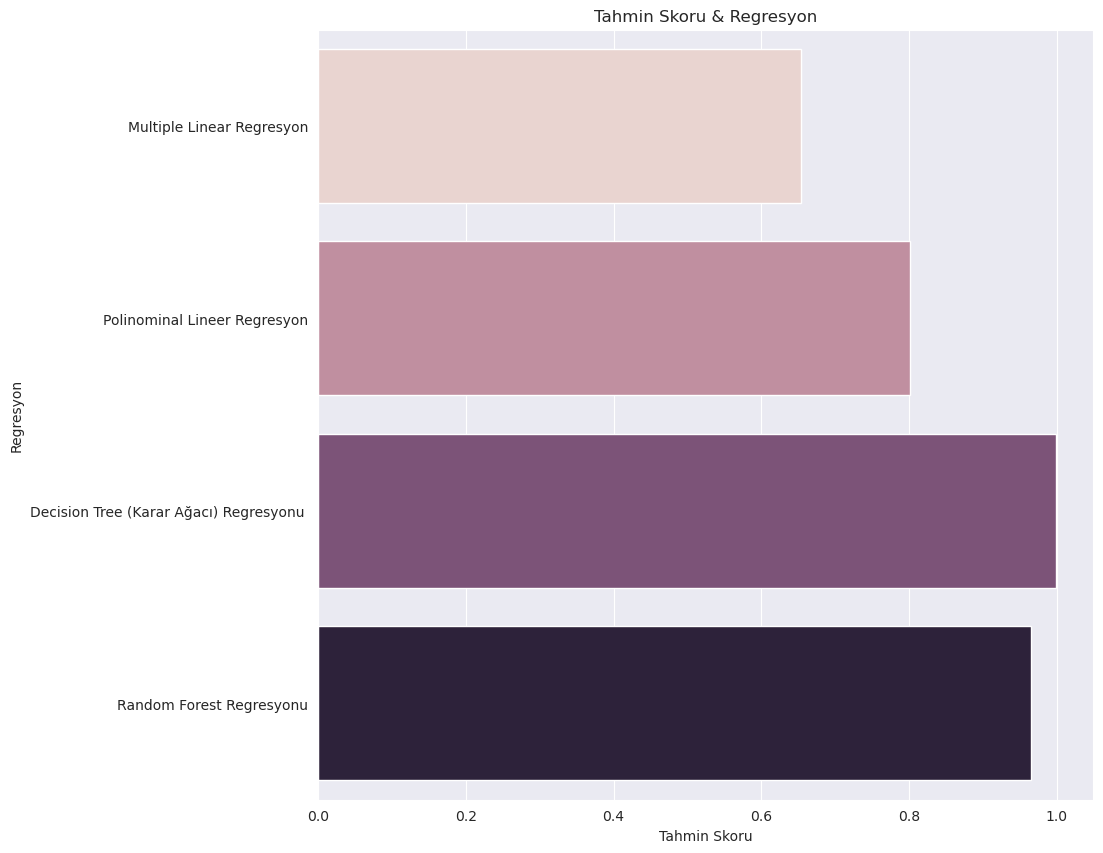

In [27]:
f,ax = plt.subplots(figsize = (10,10))
sns.barplot(x=list_score,y=list_name,palette = sns.cubehelix_palette(len(list_score)))
plt.xlabel("Tahmin Skoru")
plt.ylabel("Regresyon")
plt.title('Tahmin Skoru & Regresyon')
plt.show()